# Visualize Face Clustering Results

## Load Clustering Results

In [2]:
from matplotlib import pyplot as plt
from tqdm import tqdm

import json
import cv2

In [2]:
with open("clustered_results.json", "r") as f:
    cluster_info = json.load(f)
cluster_info.keys(), cluster_info[list(cluster_info.keys())[0]][:3]

(dict_keys(['-1', '0', '1']), [[1711], [4379], [4814]])

## Visualize Results

### Original Video

- [https://www.youtube.com/watch?v=bUQj7Ng7PCs](https://www.youtube.com/watch?v=bUQj7Ng7PCs)

### Clustering Results

In [3]:
def display_results(cluster_id, scenes):
    frame_num = sum([len(frame_ids) for frame_ids in scenes])
    rows, cols = int(frame_num/8)+1, 8
    i = 0
    fig = plt.figure(figsize=(16, rows*2))
    for scene_id, frame_ids in tqdm(enumerate(scenes), total=len(scenes), desc=f"ID-{cluster_id}"):
        for frame_id in frame_ids:
            i += 1
            fig.add_subplot(rows, cols, i)
            img_path = f"clustered_imgs/fid-{cluster_id}-{scene_id}-{frame_id}.jpg"
            img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(img)
    plt.tight_layout()
    plt.savefig(f"ID-{cluster_id}.png")
    plt.close()

In [32]:
def show_img(img_path, height_rate=0.5):
    img = cv2.imread(img_path)
    height = int(len(img) * height_rate)
    img = img[:height,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(16, 16))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.tight_layout()
    plt.show()

#### Clustered Images

In [4]:
for cluster_id, scenes in cluster_info.items():
    if cluster_id != "-1":
        display_results(cluster_id, scenes)

ID-1: 100%|██████████| 19/19 [00:02<00:00,  8.36it/s]


##### Results

- Face Detection 모델이 Face Detection을 잘하는데 비해 Face Embedding Vector가 이를 잘 구분할 수 있게 만들어지지 않음

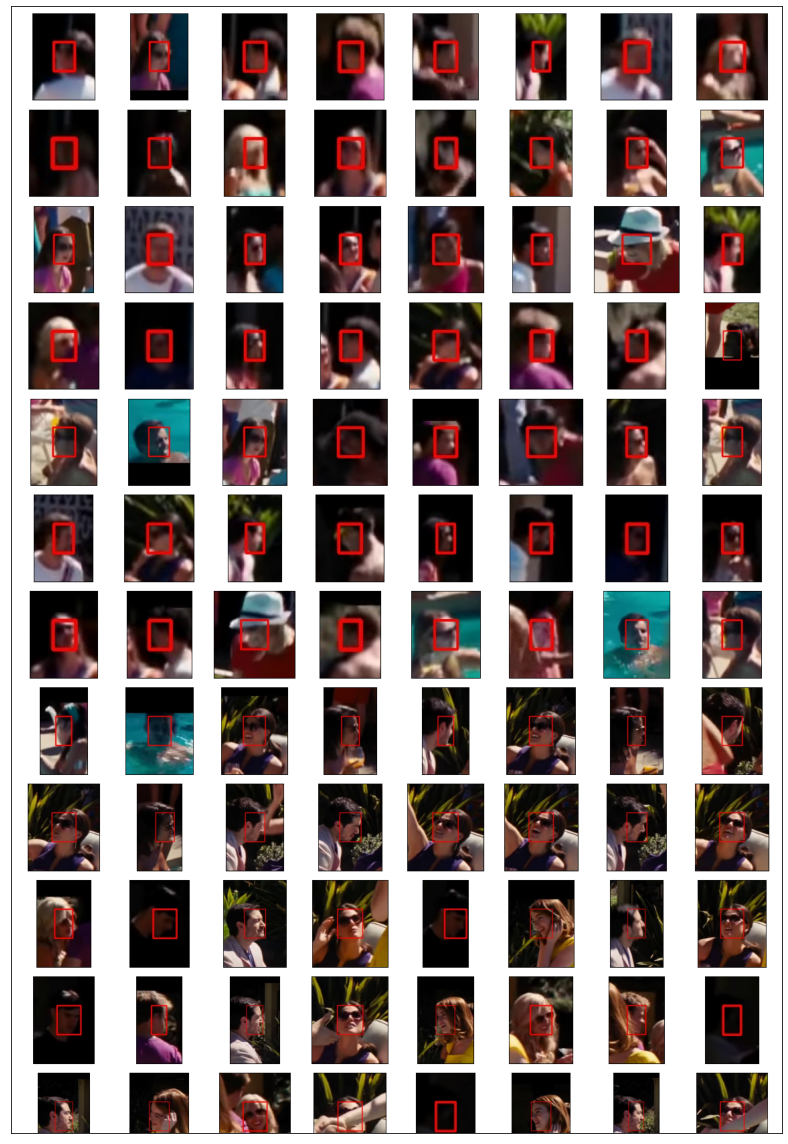

In [34]:
img_path = "ID-0.png"
show_img(img_path, height_rate=0.1)

- 잘 Clustering 되는 결과도 있음

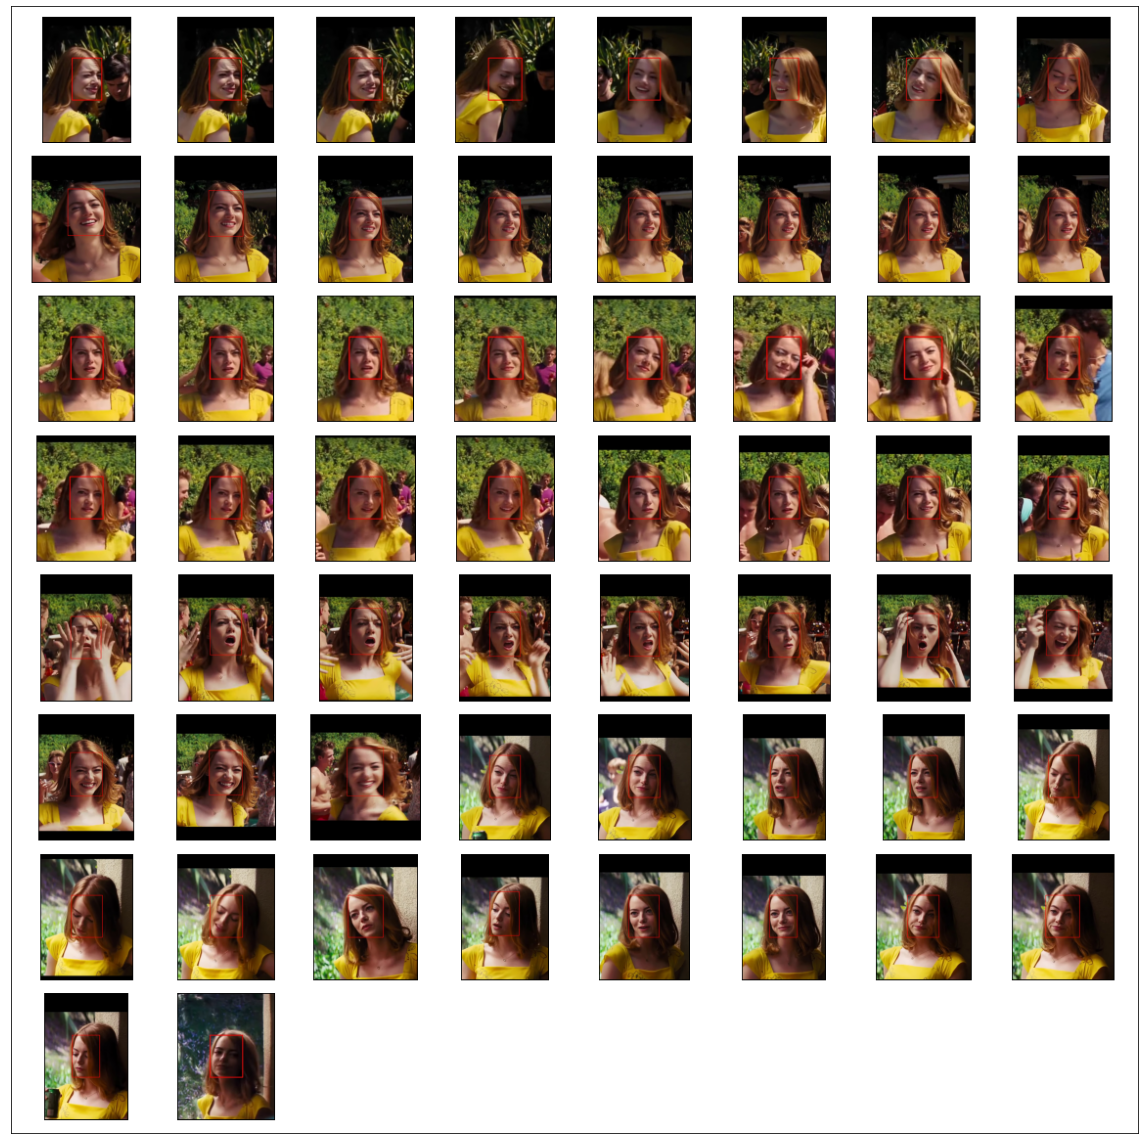

In [35]:
img_path = "ID-1.png"
show_img(img_path, height_rate=1.0)

#### Not-Clustered Images

In [5]:
for cluster_id, scenes in cluster_info.items():
    if cluster_id == "-1":
        display_results(cluster_id, scenes)

ID--1: 100%|██████████| 3/3 [00:00<00:00, 36.06it/s]


##### Results
- Face Encoding 모델을 변경해야 결과에 대해 논할 수 있음
- ID-1로 Clustering 되었어야 하는 결과가 포함되어 있음

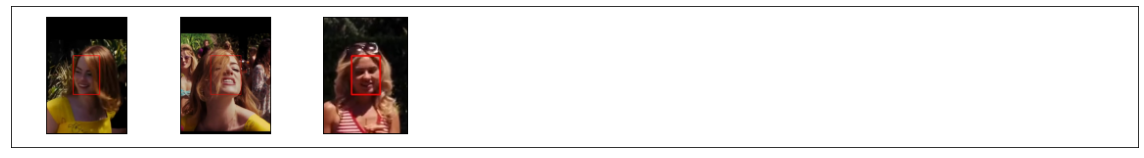

In [36]:
img_path = "ID--1.png"
show_img(img_path, height_rate=1.0)